<a href="https://colab.research.google.com/github/BrainConnection/Qiskit/blob/main/Project%20Quantum%20Challenge%202023/2.%20MNIST%20Image%20Classification/%232%20IBMQ%20QASM%20Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting


In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install matplotlib
!pip install numpy

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
import numpy as np

from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library.standard_gates import C3XGate, SwapGate, RXGate, CXGate
from qiskit.circuit.library import UnitaryGate

In [3]:
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

In [4]:
service = QiskitRuntimeService()
backend = service.get_backend("ibmq_qasm_simulator")

sampler = Sampler(backend=backend)

#1. Product State Encoding to 8 Qubits

Encoding [1, 5, 2, 6, 3, 7, 4, 8] to 8 Qubits



/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


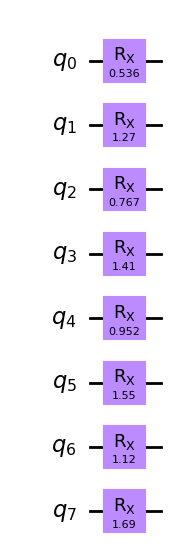

In [5]:
# Initial Setting
order = [0,1,2,3,4,5,6,7]
vector = [1,5,2,6,3,7,4,8]
norm = np.linalg.norm(vector)
Probability_1_List = []

# Circuit Setting
Eight_Qubits_Quantum_Register = QuantumRegister(8, 'q')
Eight_Qubits_Encoding = QuantumCircuit(Eight_Qubits_Quantum_Register)

# Single Rotation Matrix Implement
for j in range(8) :
  Eight_Qubits_Encoding.rx(2*np.arcsin(np.sqrt(vector[j]/norm)), Eight_Qubits_Quantum_Register[j])

# Circuit Drawing
Eight_Qubits_Encoding.draw("mpl")

Verifying Encoding : Measurement of Probabiltiy 1

[0.995943608644586, 4.991572814414311, 1.9916015601520303, 6.014939508224502, 3.01154036831652, 7.049875316088931, 4.006055691275398, 7.997542868556567]


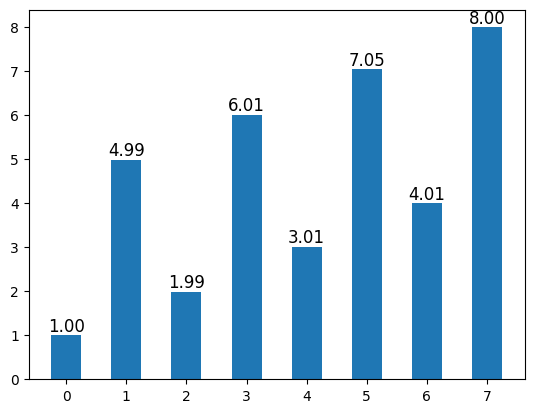

In [6]:
# Initial Setting
order = [0,1,2,3,4,5,6,7]
vector = [1,5,2,6,3,7,4,8]
norm = np.linalg.norm(vector)
Probability_1_List = []

for i in range(8) :
  # Circuit Setting
  Eight_Qubits_Quantum_Register = QuantumRegister(8, 'q')
  Eight_Qubits_Classical_Register = ClassicalRegister(8, 'c')
  Eight_Qubits_Encoding = QuantumCircuit(Eight_Qubits_Quantum_Register, Eight_Qubits_Classical_Register)

  # Single Rotation Matrix Implement
  for j in range(8) :
    Eight_Qubits_Encoding.rx(2*np.arcsin(np.sqrt(vector[j]/norm)), Eight_Qubits_Quantum_Register[j])

  # Measurement on ith qubit
  Eight_Qubits_Encoding.measure(Eight_Qubits_Quantum_Register[i], Eight_Qubits_Classical_Register[i])

  # Probability of measuring 1 on ith qubit
  job = sampler.run(Eight_Qubits_Encoding, shots=100000)
  result = job.result()

  counts = dict(result.quasi_dists[0])
  Probability_1_List.append(norm*counts[np.power(2,i)])

# Probabiltiy Bar Plot
print(Probability_1_List)

bar = plt.bar(order, Probability_1_List, 0.5)
plt.xticks(order)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
plt.show()

#2. Encoding to 3 Qubits

Encoding [1, 5, 2, 6, 3, 7, 4, 8] to 3 Qubits

[0.07001400420140048, 0.3500700210070024, 0.14002800840280097, 0.42008402520840293, 0.21004201260420147, 0.4900980294098034, 0.28005601680560194, 0.5601120336112039]
[-0.9805806756909202, 0.19611613513818404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, -0.9486832980505138, 0.31622776601683794, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, -0.9191450300180578, 0.39391929857916763, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.8944271909999159, 0.4472135954999579]
[-0.1703748109239964, -0.8518740546199819, 0.0, 0.0, 0.0, 0.0, 0.2214872542011953, 0.4429745084023906]
[0.05083942560314576, 0.2541971280157288, -0.26944895569667254, -0.8083468670900176, 0.0, 0.0, 0.20335770241258305, 0.4067154048251661]
[0.044128837330927095, 0.22064418665463548, 0.08825767466185419, 0.26477302398556257, -0.33324880605079427, -0.7775805474518533, 0.17651534932370838, 0.35303069864741676]
[[0.07001400420140048, -0.9805806756909202, 0.0, 0.0, 0.0, -0.1703748109239964, 0.05083942560314576, 0.044128837330927095], [0.350070

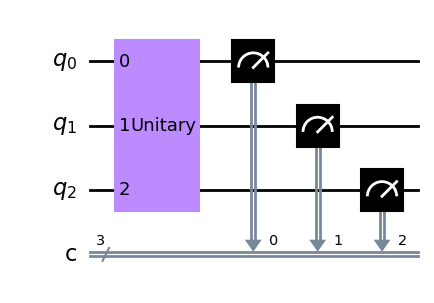

In [7]:
# Matrix Setting
vector1 = [1, 5, 2, 6, 3, 7, 4, 8]
vector2 = [-5, 1, 0, 0, 0, 0, 0, 0]
vector3 = [0, 0, -6, 2, 0, 0, 0, 0]
vector4 = [0, 0, 0, 0, -7, 3, 0, 0]
vector5 = [0, 0, 0, 0, 0, 0, -8, 4]
vector6 = [-1, -5, 0, 0, 0, 0, 1.3, 2.6]
vector7 = [10/53, 50/53, -1, -3, 0, 0, 40/53, 80/53]
vector8 = [290/73, 1450/73, 580/73, 1740/73, -30, -70, 1160/73, 2320/73]

v1 = []
v2 = []
v3 = []
v4 = []
v5 = []
v6 = []
v7 = []
v8 = []
for i in range(8):
  v1.append(vector1[i]/np.linalg.norm(vector1))
  v2.append(vector2[i]/np.linalg.norm(vector2))
  v3.append(vector3[i]/np.linalg.norm(vector3))
  v4.append(vector4[i]/np.linalg.norm(vector4))
  v5.append(vector5[i]/np.linalg.norm(vector5))
  v6.append(vector6[i]/np.linalg.norm(vector6))
  v7.append(vector7[i]/np.linalg.norm(vector7))
  v8.append(vector8[i]/np.linalg.norm(vector8))

matrix = []
print(v1)
print(v2)
print(v3)
print(v4)
print(v5)
print(v6)
print(v7)
print(v8)
for i in range(8):
  matrix.append([v1[i], v2[i], v3[i], v4[i], v5[i], v6[i], v7[i], v8[i]])

print(matrix)
gate = UnitaryGate(matrix)

# Circuit Setting
Three_Qubits_Quantum_Register = QuantumRegister(3, 'q')
Three_Qubits_Classical_Register = ClassicalRegister(3, 'c')
Three_Qubits_Encoding = QuantumCircuit(Three_Qubits_Quantum_Register, Three_Qubits_Classical_Register)

# Single Rotation Matrix Implement
Three_Qubits_Encoding.append(gate, [0, 1, 2])
Three_Qubits_Encoding.measure([0, 1, 2], [0, 1, 2])

# Circuit Drawing
Three_Qubits_Encoding.draw("mpl")

Verifying Encoding : Measurement of Probability of Each State

>>> Job ID: cle2j43k8l5ohou8bq5g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01887, 0: 0.0049, 7: 0.31415, 3: 0.17654, 5: 0.23777, 1: 0.12353, 6: 0.07987, 4: 0.04437}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01887, 0: 0.0049, 7: 0.31415, 3: 0.17654, 5: 0.23777, 1: 0.12353, 6: 0.07987, 4: 0.04437}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


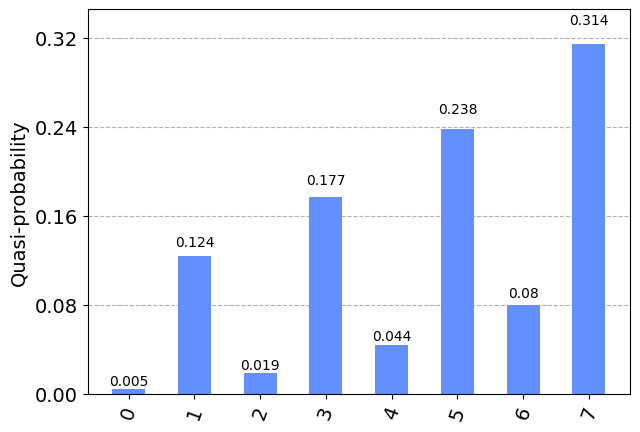

In [8]:
# Circuit Running
job = sampler.run(Three_Qubits_Encoding, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

[0.999799979995999, 5.019972111476318, 1.9620091742904773, 6.001179883989482, 3.0085677655655356, 6.964558851786666, 4.036518301705072, 8.005410670290438]


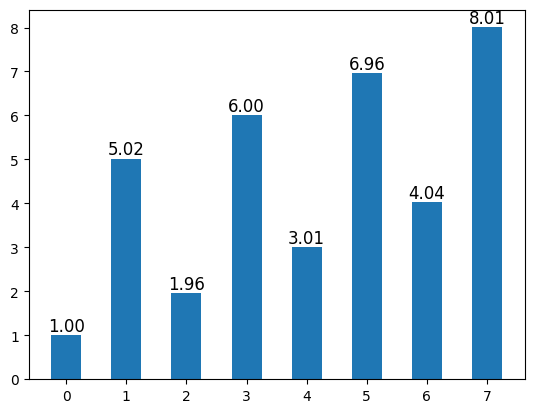

In [9]:
Encoded_List = []
for i in range(8):
  Encoded_List.append(np.linalg.norm(vector1)*np.sqrt(counts[i]))

# Probabiltiy Bar Plot
print(Encoded_List)

bar = plt.bar([0,1,2,3,4,5,6,7], Encoded_List, 0.5)
plt.xticks([0,1,2,3,4,5,6,7])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
plt.show()

#3. Enhanced Encoding Method

1) Task 1 VS Task 2

Task 1

Pros  : Only 8 single rotating gates. Low cost in gate number.

Cons  : One-Hot encoding. 8 qubits are used. High cost in qubit number.

Task2

Pros  : Binary encoding. Only 3 qubits used for encoding. Low cost in qubit number.

Cons  : too much gates to construct accurate unitary matrix whose probability of each state is equal to normalized vector's entry.

2) Enhanced Encoding Method

Constructing Enhanced Encoding

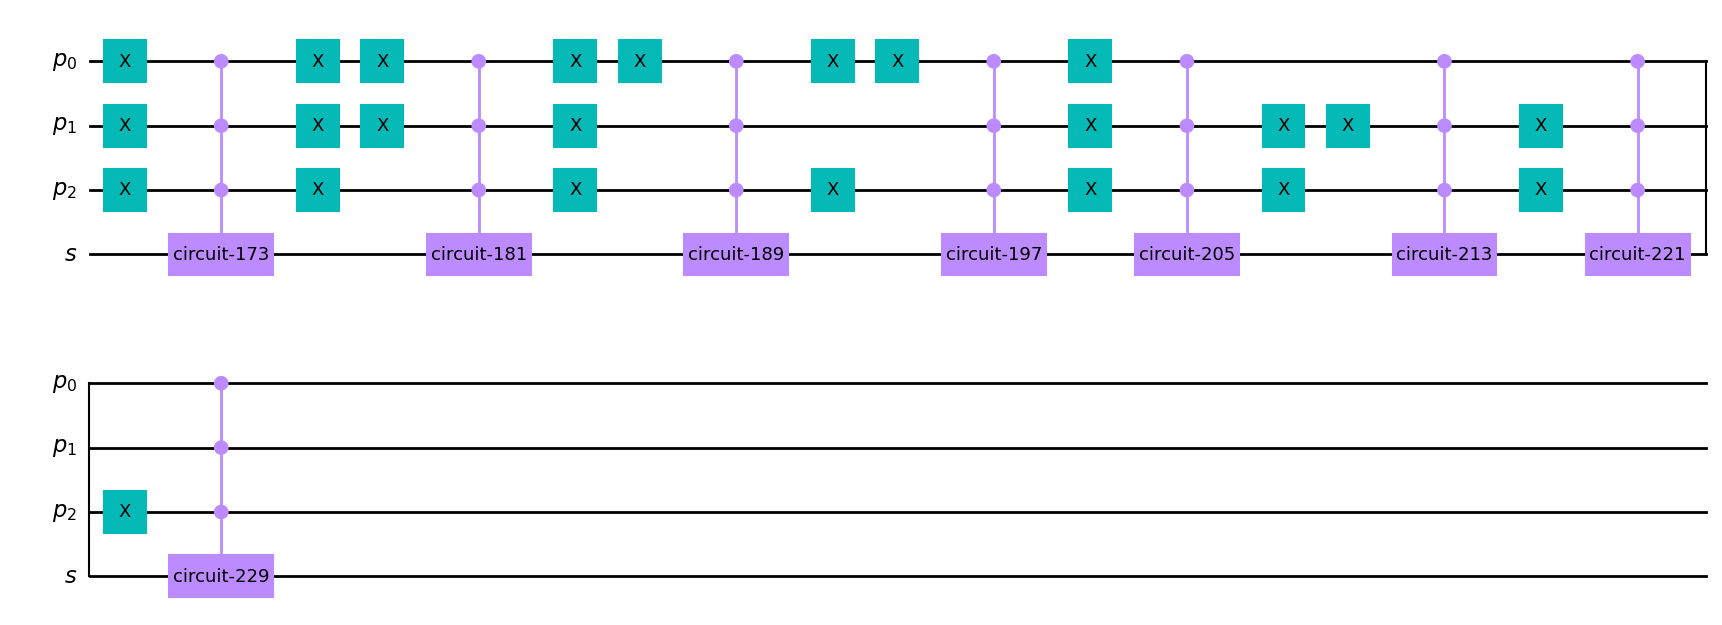

In [10]:
# Initial Setting
order = [0,1,2,3,4,5,6,7]
vector = [1,5,2,6,3,7,4,8]
norm = np.linalg.norm(vector)

# Circuit Setting
Position_Qubits = QuantumRegister(3, 'p')
Probability_Qubit = QuantumRegister(1, 's')
Four_Qubits_Encoding = QuantumCircuit(Position_Qubits, Probability_Qubit)

s = Probability_Qubit
p0, p1, p2 = Position_Qubits

# Initial State

# Probability Qubit Rotating

Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[0]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[1]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[2]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[3]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[4]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

#Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
#Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[5]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

#Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
#Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[6]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

#Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
#Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[7]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

#Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
#Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)

# Circuit Drawing
Four_Qubits_Encoding.draw("mpl")

From State 000 ~ 111, Verifying Encoding : Probability X Norm is equal to each vector entry [1, 5, 2, 6, 3, 7, 4, 8]

In [11]:
Decoded_Vector = []
Encoding = Four_Qubits_Encoding.to_gate()

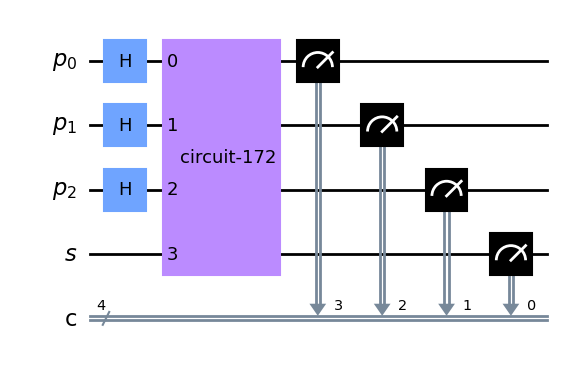

In [12]:
# Circuit Setting
Position_Qubits = QuantumRegister(3, 'p')
Probability_Qubit = QuantumRegister(1, 's')
Classical_Qubit = ClassicalRegister(4, 'c')
Four_Qubits_Measuring = QuantumCircuit(Position_Qubits, Probability_Qubit, Classical_Qubit)


# Produce Superposition State
Four_Qubits_Measuring.h(p0)
Four_Qubits_Measuring.h(p1)
Four_Qubits_Measuring.h(p2)
Four_Qubits_Measuring.append(Encoding, [0,1,2,3])
Four_Qubits_Measuring.measure([0,1,2,3], [3,2,1,0])

Four_Qubits_Measuring.draw("mpl")

>>> Job ID: cle2j4tlqrutvh1dap60
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.0259, 14: 0.0565, 1: 0.00883, 13: 0.03421, 8: 0.09953, 0: 0.11703, 3: 0.04436, 7: 0.05232, 15: 0.06952, 10: 0.06388, 5: 0.01692, 12: 0.09003, 11: 0.06102, 2: 0.07947, 4: 0.10777, 6: 0.07271}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.0259, 14: 0.0565, 1: 0.00883, 13: 0.03421, 8: 0.09953, 0: 0.11703, 3: 0.04436, 7: 0.05232, 15: 0.06952, 10: 0.06388, 5: 0.01692, 12: 0.09003, 11: 0.06102, 2: 0.07947, 4: 0.10777, 6: 0.07271}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


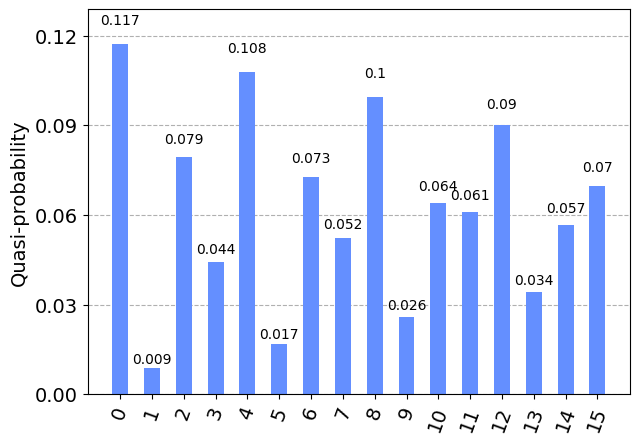

In [13]:
job = sampler.run(Four_Qubits_Measuring, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

[1.0089410083845338, 5.068700241442573, 1.9333275041751206, 5.9782325661017905, 2.9594079407881573, 6.972319403354955, 3.9089322646472144, 7.943553669636783]


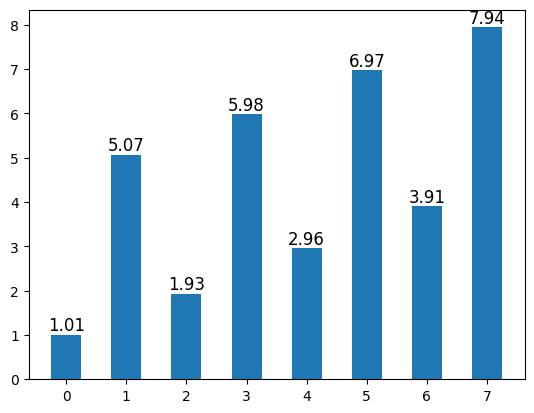

In [14]:
for i in range(8):
  Decoded_Vector.append(8*norm*cnts[2*i+1])
print(Decoded_Vector)

bar = plt.bar([0,1,2,3,4,5,6,7], Decoded_Vector, 0.5)
plt.xticks([0,1,2,3,4,5,6,7])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
plt.show()

#4. Encoding 3 X 3 Image

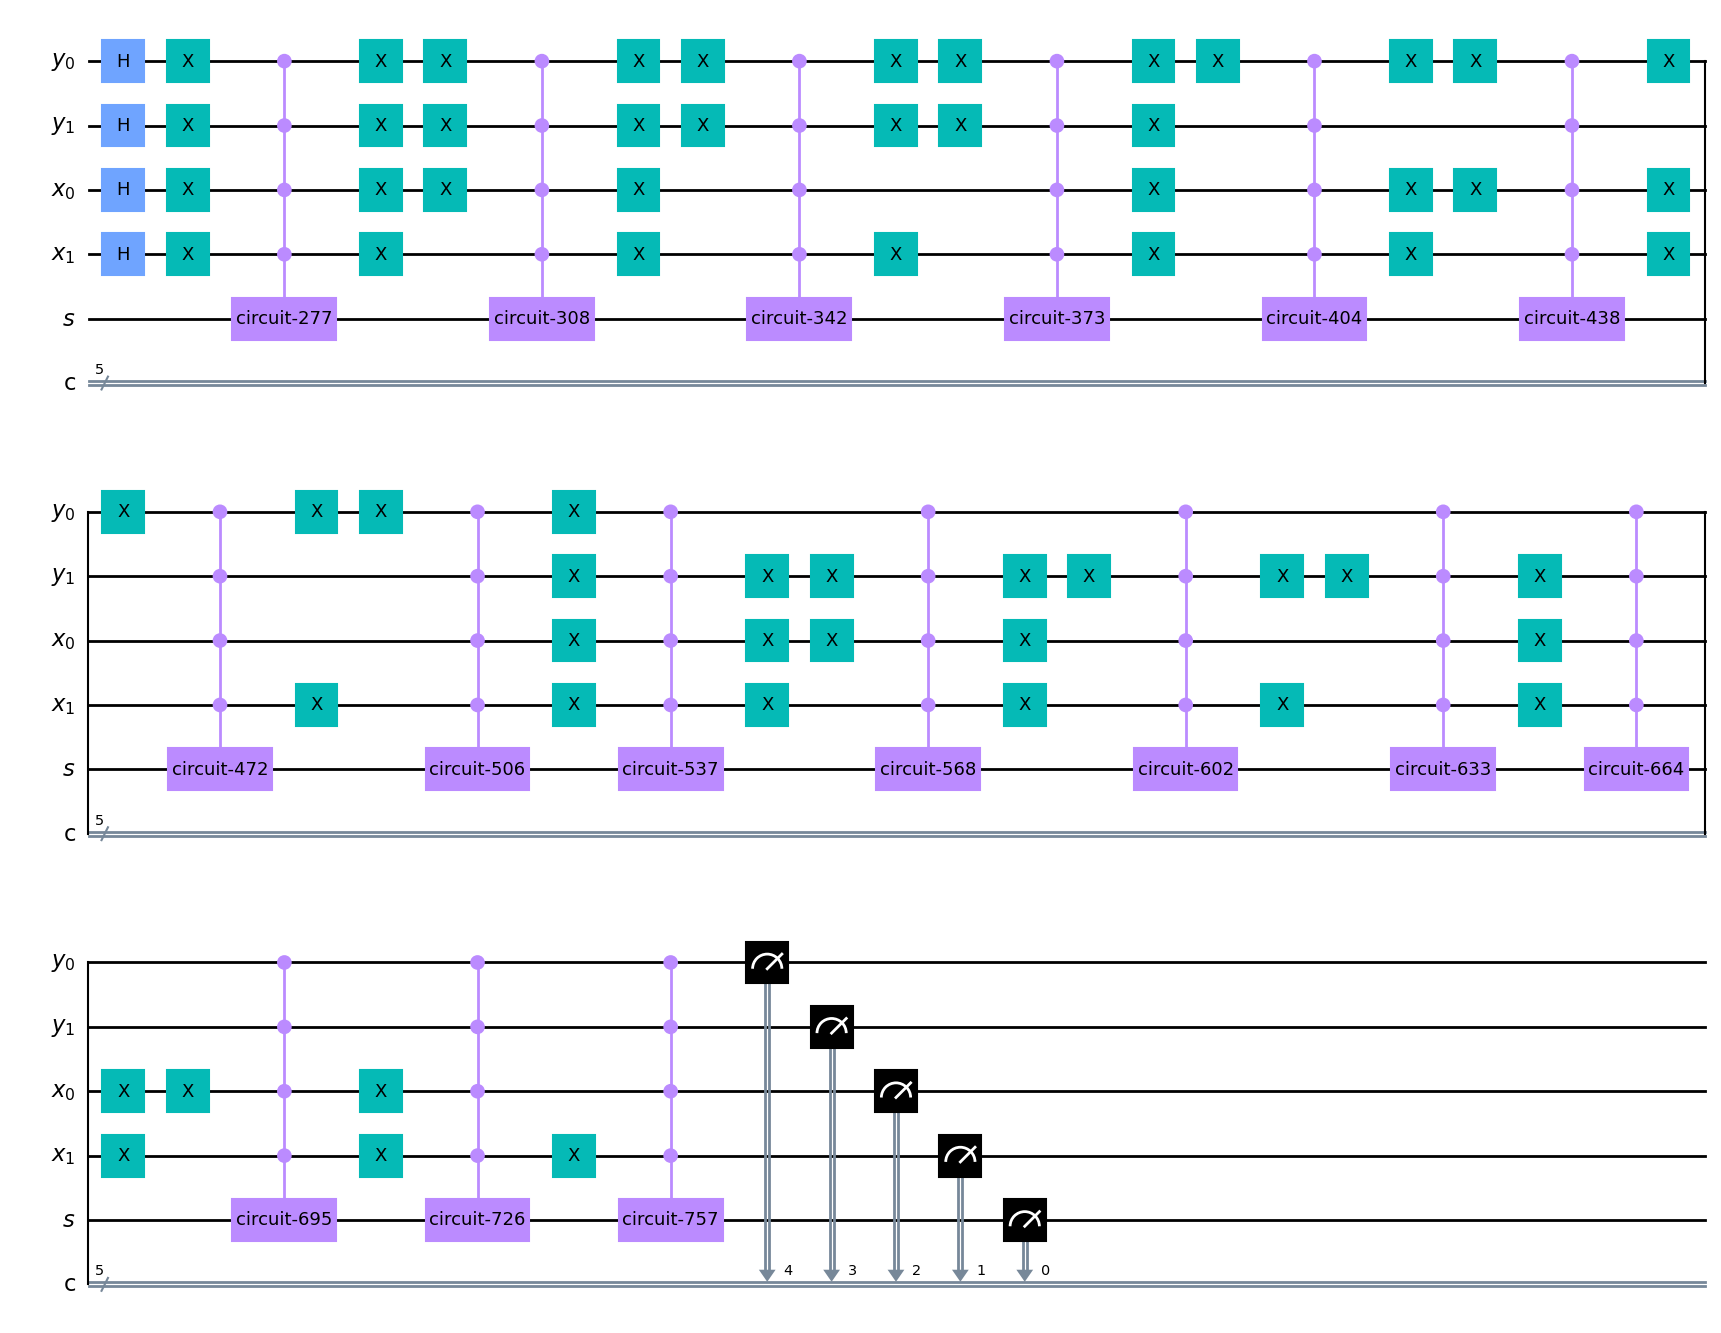

In [15]:
# adding dummy pixels to make 4 X 4. Each row and columns 2 qubits.
matrix = [[0, 0.5, 0, 0],
          [0.8, 1, 0.8, 0],
          [0, 0.5, 0, 0],
          [0, 0, 0, 0]]

# Circuit Setting
Y_Qubits = QuantumRegister(2, 'y')
X_Qubits = QuantumRegister(2, 'x')
Probability_Qubit = QuantumRegister(1, 's')
Classical_Register = ClassicalRegister(5, 'c')
Five_Qubits_Encoding = QuantumCircuit(Y_Qubits, X_Qubits, Probability_Qubit, Classical_Register)

s = Probability_Qubit
y0, y1 = Y_Qubits
x0, x1 = X_Qubits

# Initial State
Five_Qubits_Encoding.h(y0)
Five_Qubits_Encoding.h(y1)
Five_Qubits_Encoding.h(x0)
Five_Qubits_Encoding.h(x1)

# Probability Qubit Rotating
for i in range(4):
  for j in range(4):
    Rotate = QuantumCircuit(1)
    Rotate.rx(2*np.arcsin(np.sqrt(matrix[i][j])), 0)
    Ugate = Rotate.to_gate().control(4)

    if i==0:
      Five_Qubits_Encoding.x(y0)
      Five_Qubits_Encoding.x(y1)
    elif i==1:
      Five_Qubits_Encoding.x(y0)
    elif i==2:
      Five_Qubits_Encoding.x(y1)
    else:
      pass

    if j==0:
      Five_Qubits_Encoding.x(x0)
      Five_Qubits_Encoding.x(x1)
    elif j==1:
      Five_Qubits_Encoding.x(x0)
    elif j==2:
      Five_Qubits_Encoding.x(x1)
    else:
      pass

    Five_Qubits_Encoding.append(Ugate, [y0, y1, x0, x1, s])

    if i==0:
      Five_Qubits_Encoding.x(y0)
      Five_Qubits_Encoding.x(y1)
    elif i==1:
      Five_Qubits_Encoding.x(y0)
    elif i==2:
      Five_Qubits_Encoding.x(y1)
    else:
      pass

    if j==0:
      Five_Qubits_Encoding.x(x0)
      Five_Qubits_Encoding.x(x1)
    elif j==1:
      Five_Qubits_Encoding.x(x0)
    elif j==2:
      Five_Qubits_Encoding.x(x1)
    else:
      pass

Five_Qubits_Encoding.measure([0,1,2,3,4], [4,3,2,1,0])

# Circuit Drawing
Five_Qubits_Encoding.draw("mpl")

>>> Job ID: cle2j65r12tet1qs9dc0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.01251, 6: 0.06368, 19: 0.03197, 2: 0.03086, 13: 0.0501, 26: 0.06286, 11: 0.06201, 0: 0.06517, 16: 0.06162, 20: 0.06308, 28: 0.06231, 30: 0.06111, 3: 0.03069, 4: 0.06294, 22: 0.06204, 18: 0.03112, 14: 0.06185, 12: 0.01184, 24: 0.06256, 9: 0.04968}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.01251, 6: 0.06368, 19: 0.03197, 2: 0.03086, 13: 0.0501, 26: 0.06286, 11: 0.06201, 0: 0.06517, 16: 0.06162, 20: 0.06308, 28: 0.06231, 30: 0.06111, 3: 0.03069, 4: 0.06294, 22: 0.06204, 18: 0.03112, 14: 0.06185, 12: 0.01184, 24: 0.06256, 9: 0.04968}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


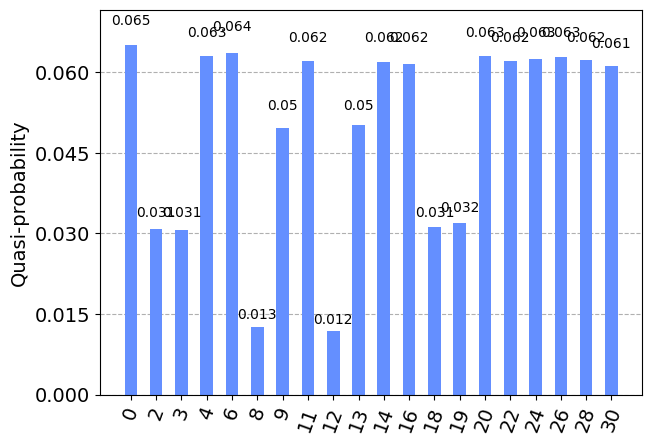

In [16]:
job = sampler.run(Five_Qubits_Encoding, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

[0, 0.49104, 0, 0.79488, 0.99216, 0.8016, 0, 0.51152, 0]


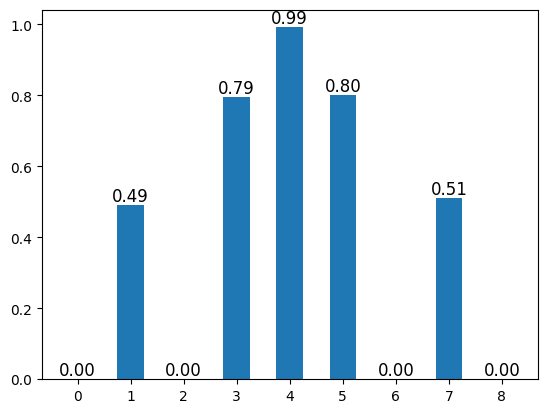

In [17]:
# Store Decoded Matrix except for dummy entry
Decoded_Matrix = []
for i in range(16):
  if i%4==3:
    pass
  elif i>10:
    pass
  elif cnts.get(2*i+1)==None:
    Decoded_Matrix.append(0)
  else:
    Decoded_Matrix.append(16*cnts.get(2*i+1))
print(Decoded_Matrix)

bar = plt.bar([0,1,2,3,4,5,6,7,8], Decoded_Matrix, 0.5)
plt.xticks([0,1,2,3,4,5,6,7,8])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
plt.show()

#Image Setting

In [18]:
from google.colab import drive
drive.mount('/content/drive')
images_test = np.load('images_test_100.npy')
labels_test = np.load('labels_test_100.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
print(images_test[0])
print(images_test[1])
print(images_test[2])
print(images_test[3])
print(images_test[4])

[[  0   0   0   0   0   0   0   5  75   0   0   0   0   0   0   0   0   5
    0  47  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  93   2   0   2   0   0   0   0   0   5
    0  65  32   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0  45  12   0   0   0   0   0   0   0   2
    0  47   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0  32 133   0   0   0   0   0   0   0   0
   80 111   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   2 229 113  65  98  85  85  93  98  70
  217 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0  55 207 164  20  20  40  32  50  12  98
  196 159   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   7   0 106 199 184 133   5   5   5   5  88 186
  166 186   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   5   0 126 191 146 174 212 103  75 199 201 151
  161 201   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   5   0 141 194 151 133 176 247 255 21

#5. Encoding 28 X 28 Image

1) Adding Dummy Entries to make 32 X 32

In [20]:
# adding dummy pixels to make 32 X 32. Each row and columns 5 qubits.
test = images_test[0]
max = np.max(test)
matrix = []
for i in range(28):
  row = []
  for j in range(28):
    row.append(test[i][j]/max)
  row.append(0)
  row.append(0)
  row.append(0)
  row.append(0)
  matrix.append(row)

matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

print(matrix)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0196078431372549, 0.29411764705882354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0196078431372549, 0.0, 0.1843137254901961, 0.10588235294117647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36470588235294116, 0.00784313725490196, 0.0, 0.00784313725490196, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0196078431372549, 0.0, 0.2549019607843137, 0.12549019607843137, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00784313725490196, 0.0, 0.17647058823529413, 0.047058823529411764, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00784313725490196, 0.0, 0.1843137254901961, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00784313725490196, 0.0, 0.12549019607843137, 0.5215686274509804, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3137254901960784, 0.43529411764705883, 0.0, 0.00784313725490196, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00784

2) Encode to 11 Qubits

In [21]:
# Circuit Setting
Y_Qubits = QuantumRegister(5, 'y')
X_Qubits = QuantumRegister(5, 'x')
Probability_Qubit = QuantumRegister(1, 's')
Classical_Register = ClassicalRegister(11, 'c')
Eleven_Qubits_Encoding = QuantumCircuit(Y_Qubits, X_Qubits, Probability_Qubit, Classical_Register)

s = Probability_Qubit
y0, y1, y2, y3, y4 = Y_Qubits
x0, x1, x2, x3, x4 = X_Qubits

# Initial State
Eleven_Qubits_Encoding.h(y0)
Eleven_Qubits_Encoding.h(y1)
Eleven_Qubits_Encoding.h(y2)
Eleven_Qubits_Encoding.h(y3)
Eleven_Qubits_Encoding.h(y4)
Eleven_Qubits_Encoding.h(x0)
Eleven_Qubits_Encoding.h(x1)
Eleven_Qubits_Encoding.h(x2)
Eleven_Qubits_Encoding.h(x3)
Eleven_Qubits_Encoding.h(x4)

def Binary(i):
  num = []
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)

  rot = []
  for j in range(5):
    rot.append(1-num[4-j])

  return rot


def Y_Not(lst):
  if lst[0]:
    Eleven_Qubits_Encoding.x(y0)
  if lst[1]:
    Eleven_Qubits_Encoding.x(y1)
  if lst[2]:
    Eleven_Qubits_Encoding.x(y2)
  if lst[3]:
    Eleven_Qubits_Encoding.x(y3)
  if lst[4]:
    Eleven_Qubits_Encoding.x(y4)


def X_Not(lst):
  if lst[0]:
    Eleven_Qubits_Encoding.x(x0)
  if lst[1]:
    Eleven_Qubits_Encoding.x(x1)
  if lst[2]:
    Eleven_Qubits_Encoding.x(x2)
  if lst[3]:
    Eleven_Qubits_Encoding.x(x3)
  if lst[4]:
    Eleven_Qubits_Encoding.x(x4)


# Probability Qubit Rotating
for i in range(32):
  for j in range(32):
    Rotate = QuantumCircuit(1)
    Rotate.rx(2*np.arcsin(np.sqrt(matrix[i][j])), 0)
    Ugate = Rotate.to_gate().control(10)

    y_rot = Binary(i)
    x_rot = Binary(j)

    Y_Not(y_rot)
    X_Not(x_rot)
    Eleven_Qubits_Encoding.append(Ugate, [y0, y1, y2, y3, y4, x0, x1, x2, x3, x4, s])
    Y_Not(y_rot)
    X_Not(x_rot)


Eleven_Qubits_Encoding.measure([0,1,2,3,4,5,6,7,8,9,10], [10,9,8,7,6,5,4,3,2,1,0])

3) Recover Image

In [22]:
job = sampler.run(Eleven_Qubits_Encoding, shots=1000000)
result = job.result()
cnts = dict(result.quasi_dists[0])

# Store Decoded Matrix except for dummy entry
Decoded_Matrix = np.zeros((28,28))
Decoded_Vector = []
for i in range(1024):
  if cnts.get(2*i+1)==None:
    Decoded_Vector.append(0)
  else:
    Decoded_Vector.append(1024*max*cnts.get(2*i+1))

for i in range(32):
  for j in range(32):
    if j>27 or i>27:
      pass
    else:
      Decoded_Matrix[i][j] = Decoded_Vector[i*32+j]

print(Decoded_Matrix)

[[  0.        0.        0.        0.        0.        0.        0.
    4.96128  77.55264   0.        0.        0.        0.        0.
    0.        0.        0.        4.17792   0.       39.69024  23.76192
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        0.
    0.       85.90848   1.04448   0.        3.13344   0.        0.
    0.        0.        0.        5.2224    0.       60.57984  33.16224
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        2.6112
    0.       48.56832  10.70592   0.        0.        0.        0.
    0.        0.        0.        1.56672   0.       47.78496   0.
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        2.6112
    0.       27.15648 131.08224   0.        0.        0.        0.
    0.        0.        0.

4) Original Image

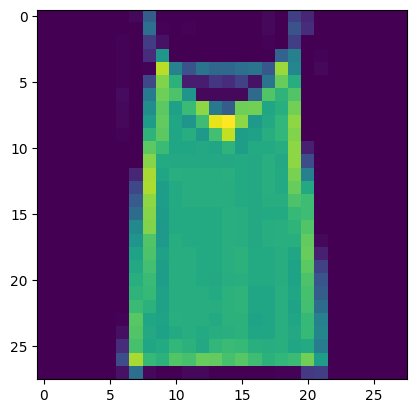

In [23]:
plt.imshow(test, interpolation='nearest')
plt.show()

5) Recovered Image

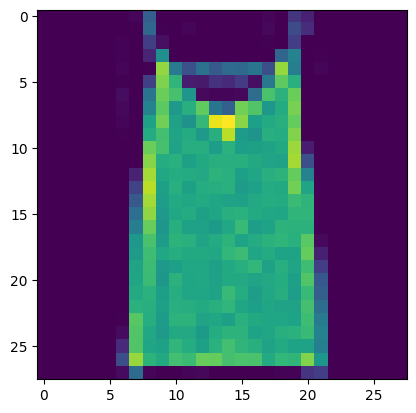

In [24]:
plt.imshow(Decoded_Matrix, interpolation='nearest')
plt.show()

#6. QPU HW Encoding

1) Image_Test[0]

In [25]:
# adding dummy pixels to make 32 X 32. Each row and columns 5 qubits.
test = images_test[0]
max = np.max(test)
matrix = []
for i in range(28):
  row = []
  for j in range(28):
    row.append(test[i][j]/max)
  row.append(0)
  row.append(0)
  row.append(0)
  row.append(0)
  matrix.append(row)

matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

print(matrix)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0196078431372549, 0.29411764705882354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0196078431372549, 0.0, 0.1843137254901961, 0.10588235294117647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36470588235294116, 0.00784313725490196, 0.0, 0.00784313725490196, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0196078431372549, 0.0, 0.2549019607843137, 0.12549019607843137, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00784313725490196, 0.0, 0.17647058823529413, 0.047058823529411764, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00784313725490196, 0.0, 0.1843137254901961, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00784313725490196, 0.0, 0.12549019607843137, 0.5215686274509804, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3137254901960784, 0.43529411764705883, 0.0, 0.00784313725490196, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00784

In [26]:
# Circuit Setting
Y_Qubits = QuantumRegister(5, 'y')
X_Qubits = QuantumRegister(5, 'x')
Probability_Qubit = QuantumRegister(1, 's')
Classical_Register = ClassicalRegister(11, 'c')
Eleven_Qubits_Encoding = QuantumCircuit(Y_Qubits, X_Qubits, Probability_Qubit, Classical_Register)

s = Probability_Qubit
y0, y1, y2, y3, y4 = Y_Qubits
x0, x1, x2, x3, x4 = X_Qubits

# Initial State
Eleven_Qubits_Encoding.h(y0)
Eleven_Qubits_Encoding.h(y1)
Eleven_Qubits_Encoding.h(y2)
Eleven_Qubits_Encoding.h(y3)
Eleven_Qubits_Encoding.h(y4)
Eleven_Qubits_Encoding.h(x0)
Eleven_Qubits_Encoding.h(x1)
Eleven_Qubits_Encoding.h(x2)
Eleven_Qubits_Encoding.h(x3)
Eleven_Qubits_Encoding.h(x4)

def Binary(i):
  num = []
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)

  rot = []
  for j in range(5):
    rot.append(1-num[4-j])

  return rot


def Y_Not(lst):
  if lst[0]:
    Eleven_Qubits_Encoding.x(y0)
  if lst[1]:
    Eleven_Qubits_Encoding.x(y1)
  if lst[2]:
    Eleven_Qubits_Encoding.x(y2)
  if lst[3]:
    Eleven_Qubits_Encoding.x(y3)
  if lst[4]:
    Eleven_Qubits_Encoding.x(y4)


def X_Not(lst):
  if lst[0]:
    Eleven_Qubits_Encoding.x(x0)
  if lst[1]:
    Eleven_Qubits_Encoding.x(x1)
  if lst[2]:
    Eleven_Qubits_Encoding.x(x2)
  if lst[3]:
    Eleven_Qubits_Encoding.x(x3)
  if lst[4]:
    Eleven_Qubits_Encoding.x(x4)


# Probability Qubit Rotating
for i in range(32):
  print(i)
  for j in range(32):
    Rotate = QuantumCircuit(1)
    Rotate.rx(2*np.arcsin(np.sqrt(matrix[i][j])), 0)
    Ugate = Rotate.to_gate().control(10)

    y_rot = Binary(i)
    x_rot = Binary(j)

    Y_Not(y_rot)
    X_Not(x_rot)
    Eleven_Qubits_Encoding.append(Ugate, [y0, y1, y2, y3, y4, x0, x1, x2, x3, x4, s])
    Y_Not(y_rot)
    X_Not(x_rot)


Eleven_Qubits_Encoding.measure([0,1,2,3,4,5,6,7,8,9,10], [10,9,8,7,6,5,4,3,2,1,0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [27]:
job = sampler.run(Eleven_Qubits_Encoding, shots=1000000)
result = job.result()
cnts = dict(result.quasi_dists[0])

# Store Decoded Matrix except for dummy entry
Decoded_Matrix = np.zeros((28,28))
Decoded_Vector = []
for i in range(1024):
  if cnts.get(2*i+1)==None:
    Decoded_Vector.append(0)
  else:
    Decoded_Vector.append(1024*max*cnts.get(2*i+1))

for i in range(32):
  for j in range(32):
    if j>27 or i>27:
      pass
    else:
      Decoded_Matrix[i][j] = Decoded_Vector[i*32+j]

print(Decoded_Matrix)

[[  0.        0.        0.        0.        0.        0.        0.
    6.00576  75.20256   0.        0.        0.        0.        0.
    0.        0.        0.        3.39456   0.       54.05184  29.50656
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        0.
    0.       86.43072   2.35008   0.        1.82784   0.        0.
    0.        0.        0.        5.74464   0.       64.49664  33.42336
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        1.82784
    0.       49.6128   11.7504    0.        0.        0.        0.
    0.        0.        0.        2.6112    0.       48.82944   0.
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        1.04448
    0.       33.42336 134.4768    0.        0.        0.        0.
    0.        0.        

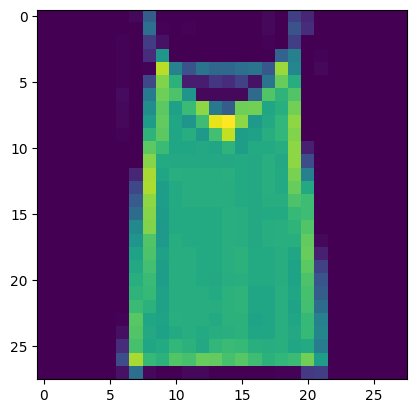

In [28]:
# Original Image
plt.imshow(test, interpolation='nearest')
plt.show()

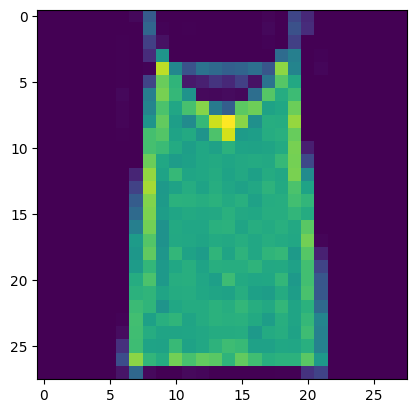

In [29]:
# Recovered Image
plt.imshow(Decoded_Matrix, interpolation='nearest')
plt.show()

2) Image_Test[1]

In [30]:
# adding dummy pixels to make 32 X 32. Each row and columns 5 qubits.
test = images_test[1]
max = np.max(test)
matrix = []
for i in range(28):
  row = []
  for j in range(28):
    row.append(test[i][j]/max)
  row.append(0)
  row.append(0)
  row.append(0)
  row.append(0)
  matrix.append(row)

matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

print(matrix)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [31]:
# Circuit Setting
Y_Qubits = QuantumRegister(5, 'y')
X_Qubits = QuantumRegister(5, 'x')
Probability_Qubit = QuantumRegister(1, 's')
Classical_Register = ClassicalRegister(11, 'c')
Eleven_Qubits_Encoding = QuantumCircuit(Y_Qubits, X_Qubits, Probability_Qubit, Classical_Register)

s = Probability_Qubit
y0, y1, y2, y3, y4 = Y_Qubits
x0, x1, x2, x3, x4 = X_Qubits

# Initial State
Eleven_Qubits_Encoding.h(y0)
Eleven_Qubits_Encoding.h(y1)
Eleven_Qubits_Encoding.h(y2)
Eleven_Qubits_Encoding.h(y3)
Eleven_Qubits_Encoding.h(y4)
Eleven_Qubits_Encoding.h(x0)
Eleven_Qubits_Encoding.h(x1)
Eleven_Qubits_Encoding.h(x2)
Eleven_Qubits_Encoding.h(x3)
Eleven_Qubits_Encoding.h(x4)

def Binary(i):
  num = []
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)

  rot = []
  for j in range(5):
    rot.append(1-num[4-j])

  return rot


def Y_Not(lst):
  if lst[0]:
    Eleven_Qubits_Encoding.x(y0)
  if lst[1]:
    Eleven_Qubits_Encoding.x(y1)
  if lst[2]:
    Eleven_Qubits_Encoding.x(y2)
  if lst[3]:
    Eleven_Qubits_Encoding.x(y3)
  if lst[4]:
    Eleven_Qubits_Encoding.x(y4)


def X_Not(lst):
  if lst[0]:
    Eleven_Qubits_Encoding.x(x0)
  if lst[1]:
    Eleven_Qubits_Encoding.x(x1)
  if lst[2]:
    Eleven_Qubits_Encoding.x(x2)
  if lst[3]:
    Eleven_Qubits_Encoding.x(x3)
  if lst[4]:
    Eleven_Qubits_Encoding.x(x4)


# Probability Qubit Rotating
for i in range(32):
  print(i)
  for j in range(32):
    Rotate = QuantumCircuit(1)
    Rotate.rx(2*np.arcsin(np.sqrt(matrix[i][j])), 0)
    Ugate = Rotate.to_gate().control(10)

    y_rot = Binary(i)
    x_rot = Binary(j)

    Y_Not(y_rot)
    X_Not(x_rot)
    Eleven_Qubits_Encoding.append(Ugate, [y0, y1, y2, y3, y4, x0, x1, x2, x3, x4, s])
    Y_Not(y_rot)
    X_Not(x_rot)


Eleven_Qubits_Encoding.measure([0,1,2,3,4,5,6,7,8,9,10], [10,9,8,7,6,5,4,3,2,1,0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [32]:
job = sampler.run(Eleven_Qubits_Encoding, shots=1000000)
result = job.result()
cnts = dict(result.quasi_dists[0])

# Store Decoded Matrix except for dummy entry
Decoded_Matrix = np.zeros((28,28))
Decoded_Vector = []
for i in range(1024):
  if cnts.get(2*i+1)==None:
    Decoded_Vector.append(0)
  else:
    Decoded_Vector.append(1024*max*cnts.get(2*i+1))

for i in range(32):
  for j in range(32):
    if j>27 or i>27:
      pass
    else:
      Decoded_Matrix[i][j] = Decoded_Vector[i*32+j]

print(Decoded_Matrix)

[[  0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        

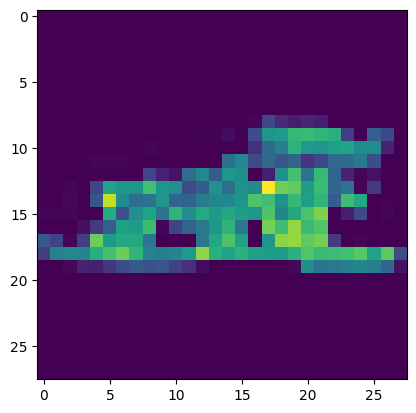

In [33]:
# Original Image
plt.imshow(test, interpolation='nearest')
plt.show()

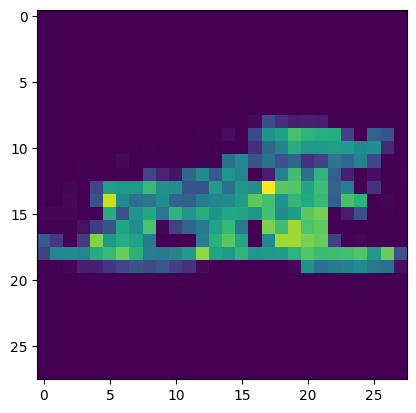

In [34]:
# Recovered Image
plt.imshow(Decoded_Matrix, interpolation='nearest')
plt.show()

3) Image_Test[2]

In [35]:
# adding dummy pixels to make 32 X 32. Each row and columns 5 qubits.
test = images_test[2]
max = np.max(test)
matrix = []
for i in range(28):
  row = []
  for j in range(28):
    row.append(test[i][j]/max)
  row.append(0)
  row.append(0)
  row.append(0)
  row.append(0)
  matrix.append(row)

matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

print(matrix)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1568627450980392, 0.36470588235294116, 0.23921568627450981, 0.07450980392156863, 0.050980392156862744, 0.0196078431372549, 0.047058823529411764, 0.09803921568627451, 0.23921568627450981, 0.6039215686274509, 0.47843137254901963, 0.20392156862745098, 0.00392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.03137254901960784, 0.3215686274509804, 0.47843137254901963, 0.5215686274509804, 0.5137254901960784, 0.5450980392156862, 0.5725490196078431, 0.5137254901960784, 0.5058823529411764, 0.5058823529411764, 0.5411764705882353, 0.6431372549019608, 0.6078431372549019, 0.44313725490196076, 0.5803921568627451, 0.6078431372549019, 0.42745098039215684, 0.08627450980392157, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.050980392156862744, 0.49411764705882355, 0.43137254901960786, 0.4117647058823529, 0.40784313725490196, 0.42745098039215684, 0.42745098039215684, 0.48627450980392156, 0.49411764705882355,

In [36]:
# Circuit Setting
Y_Qubits = QuantumRegister(5, 'y')
X_Qubits = QuantumRegister(5, 'x')
Probability_Qubit = QuantumRegister(1, 's')
Classical_Register = ClassicalRegister(11, 'c')
Eleven_Qubits_Encoding = QuantumCircuit(Y_Qubits, X_Qubits, Probability_Qubit, Classical_Register)

s = Probability_Qubit
y0, y1, y2, y3, y4 = Y_Qubits
x0, x1, x2, x3, x4 = X_Qubits

# Initial State
Eleven_Qubits_Encoding.h(y0)
Eleven_Qubits_Encoding.h(y1)
Eleven_Qubits_Encoding.h(y2)
Eleven_Qubits_Encoding.h(y3)
Eleven_Qubits_Encoding.h(y4)
Eleven_Qubits_Encoding.h(x0)
Eleven_Qubits_Encoding.h(x1)
Eleven_Qubits_Encoding.h(x2)
Eleven_Qubits_Encoding.h(x3)
Eleven_Qubits_Encoding.h(x4)

def Binary(i):
  num = []
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)

  rot = []
  for j in range(5):
    rot.append(1-num[4-j])

  return rot


def Y_Not(lst):
  if lst[0]:
    Eleven_Qubits_Encoding.x(y0)
  if lst[1]:
    Eleven_Qubits_Encoding.x(y1)
  if lst[2]:
    Eleven_Qubits_Encoding.x(y2)
  if lst[3]:
    Eleven_Qubits_Encoding.x(y3)
  if lst[4]:
    Eleven_Qubits_Encoding.x(y4)


def X_Not(lst):
  if lst[0]:
    Eleven_Qubits_Encoding.x(x0)
  if lst[1]:
    Eleven_Qubits_Encoding.x(x1)
  if lst[2]:
    Eleven_Qubits_Encoding.x(x2)
  if lst[3]:
    Eleven_Qubits_Encoding.x(x3)
  if lst[4]:
    Eleven_Qubits_Encoding.x(x4)


# Probability Qubit Rotating
for i in range(32):
  print(i)
  for j in range(32):
    Rotate = QuantumCircuit(1)
    Rotate.rx(2*np.arcsin(np.sqrt(matrix[i][j])), 0)
    Ugate = Rotate.to_gate().control(10)

    y_rot = Binary(i)
    x_rot = Binary(j)

    Y_Not(y_rot)
    X_Not(x_rot)
    Eleven_Qubits_Encoding.append(Ugate, [y0, y1, y2, y3, y4, x0, x1, x2, x3, x4, s])
    Y_Not(y_rot)
    X_Not(x_rot)


Eleven_Qubits_Encoding.measure([0,1,2,3,4,5,6,7,8,9,10], [10,9,8,7,6,5,4,3,2,1,0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [37]:
job = sampler.run(Eleven_Qubits_Encoding, shots=1000000)
result = job.result()
cnts = dict(result.quasi_dists[0])

# Store Decoded Matrix except for dummy entry
Decoded_Matrix = np.zeros((28,28))
Decoded_Vector = []
for i in range(1024):
  if cnts.get(2*i+1)==None:
    Decoded_Vector.append(0)
  else:
    Decoded_Vector.append(1024*max*cnts.get(2*i+1))

for i in range(32):
  for j in range(32):
    if j>27 or i>27:
      pass
    else:
      Decoded_Matrix[i][j] = Decoded_Vector[i*32+j]

print(Decoded_Matrix)

[[  0.        0.        0.        0.        0.        0.        0.
    0.       43.34592  95.04768  54.57408  18.01728  14.88384   5.74464
   11.7504   25.58976  69.98016 157.19424 123.77088  52.48512   0.52224
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        9.1392   75.7248
  118.8096  136.04352 135.26016 137.61024 147.01056 123.77088 130.29888
  143.09376 136.30464 157.71648 163.2     114.37056 151.18848 156.14976
  109.93152  23.5008    0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.       14.62272 120.89856 108.3648
  107.58144  97.39776 116.1984  115.15392 124.032   120.89856 159.2832
  148.57728 148.57728 147.5328   95.04768 102.35904 106.53696 110.19264
  117.504   130.29888  14.10048   0.        0.        0.        0.     ]
 [  0.        0.        0.        0.      109.6704  111.75936 102.09792
   99.2256  109.6704  102.88128 119.33184 100.79232 123.24864 139.699

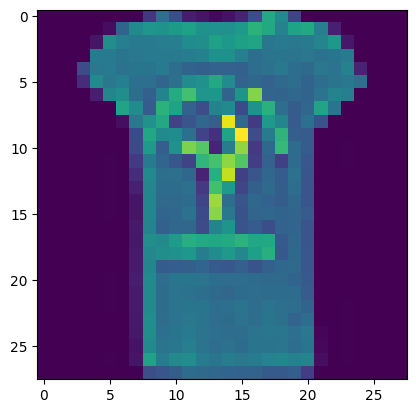

In [38]:
# Original Image
plt.imshow(test, interpolation='nearest')
plt.show()

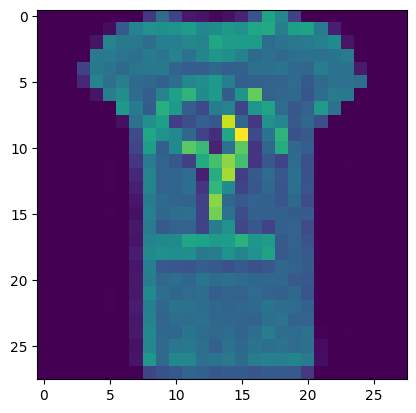

In [39]:
# Recovered Image
plt.imshow(Decoded_Matrix, interpolation='nearest')
plt.show()

4) Image_Test[3]

In [40]:
# adding dummy pixels to make 32 X 32. Each row and columns 5 qubits.
test = images_test[3]
max = np.max(test)
matrix = []
for i in range(28):
  row = []
  for j in range(28):
    row.append(test[i][j]/max)
  row.append(0)
  row.append(0)
  row.append(0)
  row.append(0)
  matrix.append(row)

matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

print(matrix)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.054901960784313725, 0.45098039215686275, 0.09803921568627451, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21176470588235294, 0.4627450980392157, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10196078431372549, 0.6588235294117647, 0.49411764705882355, 0.5882352941176471, 0.7176470588235294, 0.5686274509803921, 0.5372549019607843, 0.5176470588235295, 0.5372549019607843, 0.6039215686274509, 0.7333333333333333, 0.5647058823529412, 0.5137254901960784, 0.6392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0392156862745098, 0.5137254901960784, 0.4627450980392157, 0.4235294117647059, 0.5019607843137255, 0.6509803921568628, 0.7137254901960784, 0.7686274509803922, 0.7333333333333333, 0.611764705882353, 0.44313725490196076, 0.41568627450980394, 0.47843137254901963, 0.4588235294117647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [41]:
# Circuit Setting
Y_Qubits = QuantumRegister(5, 'y')
X_Qubits = QuantumRegister(5, 'x')
Probability_Qubit = QuantumRegister(1, 's')
Classical_Register = ClassicalRegister(11, 'c')
Eleven_Qubits_Encoding = QuantumCircuit(Y_Qubits, X_Qubits, Probability_Qubit, Classical_Register)

s = Probability_Qubit
y0, y1, y2, y3, y4 = Y_Qubits
x0, x1, x2, x3, x4 = X_Qubits

# Initial State
Eleven_Qubits_Encoding.h(y0)
Eleven_Qubits_Encoding.h(y1)
Eleven_Qubits_Encoding.h(y2)
Eleven_Qubits_Encoding.h(y3)
Eleven_Qubits_Encoding.h(y4)
Eleven_Qubits_Encoding.h(x0)
Eleven_Qubits_Encoding.h(x1)
Eleven_Qubits_Encoding.h(x2)
Eleven_Qubits_Encoding.h(x3)
Eleven_Qubits_Encoding.h(x4)

def Binary(i):
  num = []
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)

  rot = []
  for j in range(5):
    rot.append(1-num[4-j])

  return rot


def Y_Not(lst):
  if lst[0]:
    Eleven_Qubits_Encoding.x(y0)
  if lst[1]:
    Eleven_Qubits_Encoding.x(y1)
  if lst[2]:
    Eleven_Qubits_Encoding.x(y2)
  if lst[3]:
    Eleven_Qubits_Encoding.x(y3)
  if lst[4]:
    Eleven_Qubits_Encoding.x(y4)


def X_Not(lst):
  if lst[0]:
    Eleven_Qubits_Encoding.x(x0)
  if lst[1]:
    Eleven_Qubits_Encoding.x(x1)
  if lst[2]:
    Eleven_Qubits_Encoding.x(x2)
  if lst[3]:
    Eleven_Qubits_Encoding.x(x3)
  if lst[4]:
    Eleven_Qubits_Encoding.x(x4)


# Probability Qubit Rotating
for i in range(32):
  print(i)
  for j in range(32):
    Rotate = QuantumCircuit(1)
    Rotate.rx(2*np.arcsin(np.sqrt(matrix[i][j])), 0)
    Ugate = Rotate.to_gate().control(10)

    y_rot = Binary(i)
    x_rot = Binary(j)

    Y_Not(y_rot)
    X_Not(x_rot)
    Eleven_Qubits_Encoding.append(Ugate, [y0, y1, y2, y3, y4, x0, x1, x2, x3, x4, s])
    Y_Not(y_rot)
    X_Not(x_rot)


Eleven_Qubits_Encoding.measure([0,1,2,3,4,5,6,7,8,9,10], [10,9,8,7,6,5,4,3,2,1,0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [42]:
job = sampler.run(Eleven_Qubits_Encoding, shots=1000000)
result = job.result()
cnts = dict(result.quasi_dists[0])

# Store Decoded Matrix except for dummy entry
Decoded_Matrix = np.zeros((28,28))
Decoded_Vector = []
for i in range(1024):
  if cnts.get(2*i+1)==None:
    Decoded_Vector.append(0)
  else:
    Decoded_Vector.append(1024*max*cnts.get(2*i+1))

for i in range(32):
  for j in range(32):
    if j>27 or i>27:
      pass
    else:
      Decoded_Matrix[i][j] = Decoded_Vector[i*32+j]

print(Decoded_Matrix)

[[  0.        0.        0.        0.        0.        0.        0.
    0.        0.       12.79488 117.24288  22.1952    0.        0.
    0.        0.        0.       53.79072 124.55424   0.        0.
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        0.
   22.45632 160.06656 124.55424 150.40512 191.13984 144.13824 132.64896
  136.04352 132.91008 159.02208 190.09536 143.09376 121.4208  163.98336
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        0.
    9.92256 123.77088 123.24864 109.6704  119.07072 157.71648 190.6176
  193.2288  186.17856 156.93312 118.8096  115.93728 122.46528 111.23712
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        0.
    0.      125.07648 127.16544 112.80384 103.66464 100.5312  118.54848
  124.032    95.8310

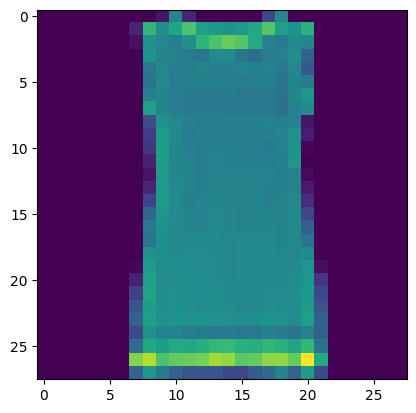

In [43]:
# Original Image
plt.imshow(test, interpolation='nearest')
plt.show()

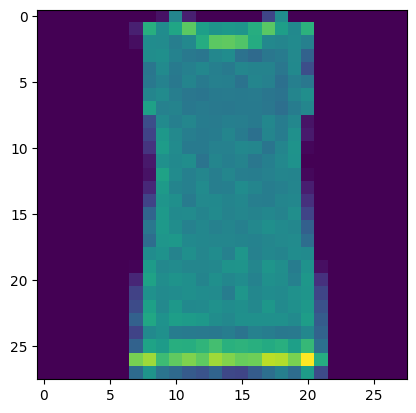

In [44]:
# Recovered Image
plt.imshow(Decoded_Matrix, interpolation='nearest')
plt.show()

5) Image_Test[4]

In [45]:
# adding dummy pixels to make 32 X 32. Each row and columns 5 qubits.
test = images_test[4]
max = np.max(test)
matrix = []
for i in range(28):
  row = []
  for j in range(28):
    row.append(test[i][j]/max)
  row.append(0)
  row.append(0)
  row.append(0)
  row.append(0)
  matrix.append(row)

matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

print(matrix)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.043137254901960784, 0.6235294117647059, 0.5607843137254902, 0.2980392156862745, 0.23137254901960785, 0.1843137254901961, 0.21176470588235294, 0.5215686274509804, 0.5764705882352941, 0.1411764705882353, 0.0, 0.0, 0.0, 0.0, 0.00392156862745098, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19607843137254902, 0.5254901960784314, 0.8274509803921568, 0.7647058823529411, 0.8274509803921568, 0.8627450980392157, 0.9176470588235294, 0.9882352941176471, 0.9803921568627451, 0.9921568627450981, 0.9411764705882353, 0.8784313725490196, 0.9058823529411765, 0.7176470588235294, 0.5098039215686274, 0.3254901960784314, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.7764705882352941, 0.9176470588235294, 0.8470588235294118, 0.7137254901960784, 0.5764705882352941, 0.611764705882353, 0.7764705882352941, 0.6784313725490196, 0.7450980392156863, 0.803921568627451, 0.8313725490196079, 0.8549019607843137, 0.75686274509803

In [46]:
# Circuit Setting
Y_Qubits = QuantumRegister(5, 'y')
X_Qubits = QuantumRegister(5, 'x')
Probability_Qubit = QuantumRegister(1, 's')
Classical_Register = ClassicalRegister(11, 'c')
Eleven_Qubits_Encoding = QuantumCircuit(Y_Qubits, X_Qubits, Probability_Qubit, Classical_Register)

s = Probability_Qubit
y0, y1, y2, y3, y4 = Y_Qubits
x0, x1, x2, x3, x4 = X_Qubits

# Initial State
Eleven_Qubits_Encoding.h(y0)
Eleven_Qubits_Encoding.h(y1)
Eleven_Qubits_Encoding.h(y2)
Eleven_Qubits_Encoding.h(y3)
Eleven_Qubits_Encoding.h(y4)
Eleven_Qubits_Encoding.h(x0)
Eleven_Qubits_Encoding.h(x1)
Eleven_Qubits_Encoding.h(x2)
Eleven_Qubits_Encoding.h(x3)
Eleven_Qubits_Encoding.h(x4)

def Binary(i):
  num = []
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)

  rot = []
  for j in range(5):
    rot.append(1-num[4-j])

  return rot


def Y_Not(lst):
  if lst[0]:
    Eleven_Qubits_Encoding.x(y0)
  if lst[1]:
    Eleven_Qubits_Encoding.x(y1)
  if lst[2]:
    Eleven_Qubits_Encoding.x(y2)
  if lst[3]:
    Eleven_Qubits_Encoding.x(y3)
  if lst[4]:
    Eleven_Qubits_Encoding.x(y4)


def X_Not(lst):
  if lst[0]:
    Eleven_Qubits_Encoding.x(x0)
  if lst[1]:
    Eleven_Qubits_Encoding.x(x1)
  if lst[2]:
    Eleven_Qubits_Encoding.x(x2)
  if lst[3]:
    Eleven_Qubits_Encoding.x(x3)
  if lst[4]:
    Eleven_Qubits_Encoding.x(x4)


# Probability Qubit Rotating
for i in range(32):
  print(i)
  for j in range(32):
    Rotate = QuantumCircuit(1)
    Rotate.rx(2*np.arcsin(np.sqrt(matrix[i][j])), 0)
    Ugate = Rotate.to_gate().control(10)

    y_rot = Binary(i)
    x_rot = Binary(j)

    Y_Not(y_rot)
    X_Not(x_rot)
    Eleven_Qubits_Encoding.append(Ugate, [y0, y1, y2, y3, y4, x0, x1, x2, x3, x4, s])
    Y_Not(y_rot)
    X_Not(x_rot)


Eleven_Qubits_Encoding.measure([0,1,2,3,4,5,6,7,8,9,10], [10,9,8,7,6,5,4,3,2,1,0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [47]:
job = sampler.run(Eleven_Qubits_Encoding, shots=1000000)
result = job.result()
cnts = dict(result.quasi_dists[0])

# Store Decoded Matrix except for dummy entry
Decoded_Matrix = np.zeros((28,28))
Decoded_Vector = []
for i in range(1024):
  if cnts.get(2*i+1)==None:
    Decoded_Vector.append(0)
  else:
    Decoded_Vector.append(1024*max*cnts.get(2*i+1))

for i in range(32):
  for j in range(32):
    if j>27 or i>27:
      pass
    else:
      Decoded_Matrix[i][j] = Decoded_Vector[i*32+j]

print(Decoded_Matrix)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9225600e+00
  1.6633344e+02 1.4257152e+02 7.2069120e+01 6.2668800e+01 5.1440640e+01
  5.3529600e+01 1.3082112e+02 1.5066624e+02 3.1856640e+01 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3056000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 4.6740480e+01 1.2899328e+02 2.1620736e+02 1.9897344e+02
  2.1542400e+02 2.1490176e+02 2.5798656e+02 2.5250304e+02 2.5746432e+02
  2.4701952e+02 2.3579136e+02 2.2586880e+02 2.1777408e+02 1.8957312e+02
  1.2350976e+02 8.3558400e+01 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.0445696e+02 2.3866368e+02 2.1333504e+02 1.7651712e+02 1.3526016e+02
  1.6346112e+02 2.0654592e+02 1.8017280e+02 1.

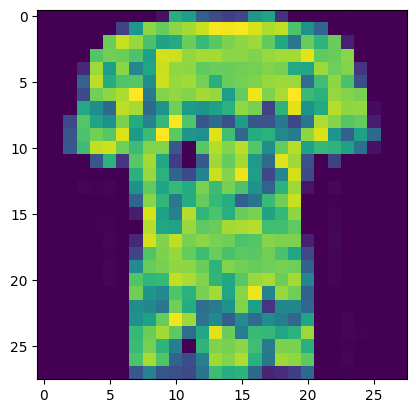

In [48]:
# Original Image
plt.imshow(test, interpolation='nearest')
plt.show()

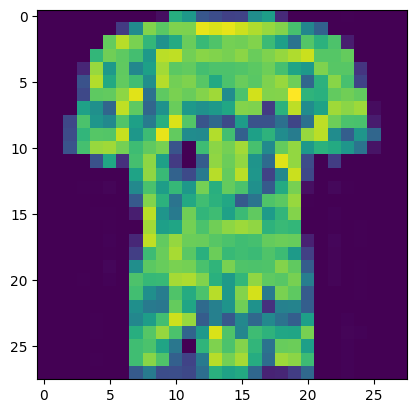

In [49]:
# Recovered Image
plt.imshow(Decoded_Matrix, interpolation='nearest')
plt.show()

#7. MNIST Image Classification

1) Training Set / Validation Set Seperation

In [50]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator

Train_Image = images_test[0:80]
Validate_Image = images_test[80:]
Train_Label = labels_test[0:80]
Validate_Label = labels_test[80:]

2) Constructing Encoded Circuit List to decrease calculation

In [51]:
# test is numpy array
def add_dummy(test):
  # adding dummy pixels to make 32 X 32. Each row and columns 5 qubits.
  max = np.max(test)
  matrix = []
  for i in range(28):
    row = []
    for j in range(28):
      row.append(test[i][j]/max)
    row.append(0)
    row.append(0)
    row.append(0)
    row.append(0)
    matrix.append(row)

  matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
  matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
  matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
  matrix.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
  return matrix

In [52]:
def Binary(i):
  num = []
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)
  i = i//2
  num.append(i%2)

  rot = []
  for j in range(5):
    rot.append(1-num[4-j])

  return rot

In [53]:
def controlled_ry(theta):
  Rotate = QuantumCircuit(1)
  Rotate.ry(theta, 0)
  Ugate = Rotate.to_gate().control(1)
  return Ugate

In [54]:
def circuit_after_encoding(matrix):
    # State Encoding

  Y_Qubits = QuantumRegister(5, 'y')
  X_Qubits = QuantumRegister(5, 'x')
  Probability_Qubit = QuantumRegister(1, 's')
  Eleven_Qubits_Encoding = QuantumCircuit(Y_Qubits, X_Qubits, Probability_Qubit)

  s = Probability_Qubit
  y0, y1, y2, y3, y4 = Y_Qubits
  x0, x1, x2, x3, x4 = X_Qubits

  # Initial State
  Eleven_Qubits_Encoding.h(y0)
  Eleven_Qubits_Encoding.h(y1)
  Eleven_Qubits_Encoding.h(y2)
  Eleven_Qubits_Encoding.h(y3)
  Eleven_Qubits_Encoding.h(y4)
  Eleven_Qubits_Encoding.h(x0)
  Eleven_Qubits_Encoding.h(x1)
  Eleven_Qubits_Encoding.h(x2)
  Eleven_Qubits_Encoding.h(x3)
  Eleven_Qubits_Encoding.h(x4)

  # Probability Qubit Rotating
  for i in range(32):
    for j in range(32):
      Rotate = QuantumCircuit(1)
      Rotate.rx(2*np.arcsin(np.sqrt(matrix[i][j])), 0)
      Ugate = Rotate.to_gate().control(10)

      y_rot = Binary(i)
      x_rot = Binary(j)

      if y_rot[0]:
        Eleven_Qubits_Encoding.x(y0)
      if y_rot[1]:
        Eleven_Qubits_Encoding.x(y1)
      if y_rot[2]:
        Eleven_Qubits_Encoding.x(y2)
      if y_rot[3]:
        Eleven_Qubits_Encoding.x(y3)
      if y_rot[4]:
        Eleven_Qubits_Encoding.x(y4)
      if x_rot[0]:
        Eleven_Qubits_Encoding.x(x0)
      if x_rot[1]:
        Eleven_Qubits_Encoding.x(x1)
      if x_rot[2]:
        Eleven_Qubits_Encoding.x(x2)
      if x_rot[3]:
        Eleven_Qubits_Encoding.x(x3)
      if x_rot[4]:
        Eleven_Qubits_Encoding.x(x4)
      Eleven_Qubits_Encoding.append(Ugate, [y0, y1, y2, y3, y4, x0, x1, x2, x3, x4, s])
      if y_rot[0]:
        Eleven_Qubits_Encoding.x(y0)
      if y_rot[1]:
        Eleven_Qubits_Encoding.x(y1)
      if y_rot[2]:
        Eleven_Qubits_Encoding.x(y2)
      if y_rot[3]:
        Eleven_Qubits_Encoding.x(y3)
      if y_rot[4]:
        Eleven_Qubits_Encoding.x(y4)
      if x_rot[0]:
        Eleven_Qubits_Encoding.x(x0)
      if x_rot[1]:
        Eleven_Qubits_Encoding.x(x1)
      if x_rot[2]:
        Eleven_Qubits_Encoding.x(x2)
      if x_rot[3]:
        Eleven_Qubits_Encoding.x(x3)
      if x_rot[4]:
        Eleven_Qubits_Encoding.x(x4)

  VGate = Eleven_Qubits_Encoding.to_gate()
  return VGate

In [55]:
Encoded_List = []
for i in range(80):
  Encoded_List.append(circuit_after_encoding(add_dummy(Train_Image[i])))

In [56]:
print(Encoded_List)

[Instruction(name='circuit-216611', num_qubits=11, num_clbits=0, params=[]), Instruction(name='circuit-250462', num_qubits=11, num_clbits=0, params=[]), Instruction(name='circuit-283917', num_qubits=11, num_clbits=0, params=[]), Instruction(name='circuit-318044', num_qubits=11, num_clbits=0, params=[]), Instruction(name='circuit-351940', num_qubits=11, num_clbits=0, params=[]), Instruction(name='circuit-386235', num_qubits=11, num_clbits=0, params=[]), Instruction(name='circuit-419486', num_qubits=11, num_clbits=0, params=[]), Instruction(name='circuit-453589', num_qubits=11, num_clbits=0, params=[]), Instruction(name='circuit-487788', num_qubits=11, num_clbits=0, params=[]), Instruction(name='circuit-521861', num_qubits=11, num_clbits=0, params=[]), Instruction(name='circuit-556132', num_qubits=11, num_clbits=0, params=[]), Instruction(name='circuit-590193', num_qubits=11, num_clbits=0, params=[]), Instruction(name='circuit-623555', num_qubits=11, num_clbits=0, params=[]), Instruction

3) Constructing Parametrized Circuit

In [57]:
# test is nested list
# 'single' is # of 6 parameter on single qubit rotation
# 'entangle' is # of 6 parameter on two qubit entanglement.
def ansatz_for_each_image(num, single, entangle, single_s, entangle_s):


  # State Encoding

  Y_Qubits = QuantumRegister(5, 'y')
  X_Qubits = QuantumRegister(5, 'x')
  Probability_Qubit = QuantumRegister(1, 's')
  Classical_Register = ClassicalRegister(1, 'c')
  Eleven_Qubits_Encoding = QuantumCircuit(Y_Qubits, X_Qubits, Probability_Qubit, Classical_Register)

  s = Probability_Qubit
  y0, y1, y2, y3, y4 = Y_Qubits
  x0, x1, x2, x3, x4 = X_Qubits

  # Start from Encoded State
  Eleven_Qubits_Encoding.append(Encoded_List[num], [y0, y1, y2, y3, y4, x0, x1, x2, x3, x4, s])

  # Parametrized Quantum Circuit

  # Universal Hadamard Gate
  Eleven_Qubits_Encoding.h(y0)
  Eleven_Qubits_Encoding.h(y1)
  Eleven_Qubits_Encoding.h(y2)
  Eleven_Qubits_Encoding.h(y3)
  Eleven_Qubits_Encoding.h(y4)
  Eleven_Qubits_Encoding.h(x0)
  Eleven_Qubits_Encoding.h(x1)
  Eleven_Qubits_Encoding.h(x2)
  Eleven_Qubits_Encoding.h(x3)
  Eleven_Qubits_Encoding.h(x4)

  # Single Qubit Rotation & Two Qubits Entanglement Chain
  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [y0, y1])
  Eleven_Qubits_Encoding.rx(single, y0)
  Eleven_Qubits_Encoding.append(CXGate(), [y0, y1])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [y1, y2])
  Eleven_Qubits_Encoding.rx(single, y1)
  Eleven_Qubits_Encoding.append(CXGate(), [y1, y2])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [y2, y3])
  Eleven_Qubits_Encoding.rx(single, y2)
  Eleven_Qubits_Encoding.append(CXGate(), [y2, y3])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [y3, y4])
  Eleven_Qubits_Encoding.rx(single, y3)
  Eleven_Qubits_Encoding.append(CXGate(), [y3, y4])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [y4, s])
  Eleven_Qubits_Encoding.rx(single, y4)
  Eleven_Qubits_Encoding.append(CXGate(), [y4, s])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle_s), [s, y0])
  Eleven_Qubits_Encoding.rx(single_s, s)
  Eleven_Qubits_Encoding.append(CXGate(), [s, y0])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [x0, x1])
  Eleven_Qubits_Encoding.rx(single, x0)
  Eleven_Qubits_Encoding.append(CXGate(), [x0, x1])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [x1, x2])
  Eleven_Qubits_Encoding.rx(single, x1)
  Eleven_Qubits_Encoding.append(CXGate(), [x1, x2])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [x2, x3])
  Eleven_Qubits_Encoding.rx(single, x2)
  Eleven_Qubits_Encoding.append(CXGate(), [x2, x3])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [x3, x4])
  Eleven_Qubits_Encoding.rx(single, x3)
  Eleven_Qubits_Encoding.append(CXGate(), [x3, x4])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [x4, s])
  Eleven_Qubits_Encoding.rx(single, x4)
  Eleven_Qubits_Encoding.append(CXGate(), [x4, s])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle_s), [s, x0])
  Eleven_Qubits_Encoding.rx(single_s, s)
  Eleven_Qubits_Encoding.append(CXGate(), [s, x0])

  Eleven_Qubits_Encoding.barrier()

  # Universal Hadamard Gate
  Eleven_Qubits_Encoding.h(y0)
  Eleven_Qubits_Encoding.h(y1)
  Eleven_Qubits_Encoding.h(y2)
  Eleven_Qubits_Encoding.h(y3)
  Eleven_Qubits_Encoding.h(y4)
  Eleven_Qubits_Encoding.h(x0)
  Eleven_Qubits_Encoding.h(x1)
  Eleven_Qubits_Encoding.h(x2)
  Eleven_Qubits_Encoding.h(x3)
  Eleven_Qubits_Encoding.h(x4)

  # Single Qubit Rotation & Two Qubits Entanglement Chain
  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [y0, y1])
  Eleven_Qubits_Encoding.rx(single, y0)
  Eleven_Qubits_Encoding.append(CXGate(), [y0, y1])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [y1, y2])
  Eleven_Qubits_Encoding.rx(single, y1)
  Eleven_Qubits_Encoding.append(CXGate(), [y1, y2])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [y2, y3])
  Eleven_Qubits_Encoding.rx(single, y2)
  Eleven_Qubits_Encoding.append(CXGate(), [y2, y3])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [y3, y4])
  Eleven_Qubits_Encoding.rx(single, y3)
  Eleven_Qubits_Encoding.append(CXGate(), [y3, y4])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [y4, s])
  Eleven_Qubits_Encoding.rx(single, y4)
  Eleven_Qubits_Encoding.append(CXGate(), [y4, s])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [x0, x1])
  Eleven_Qubits_Encoding.rx(single, x0)
  Eleven_Qubits_Encoding.append(CXGate(), [x0, x1])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [x1, x2])
  Eleven_Qubits_Encoding.rx(single, x1)
  Eleven_Qubits_Encoding.append(CXGate(), [x1, x2])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [x2, x3])
  Eleven_Qubits_Encoding.rx(single, x2)
  Eleven_Qubits_Encoding.append(CXGate(), [x2, x3])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [x3, x4])
  Eleven_Qubits_Encoding.rx(single, x3)
  Eleven_Qubits_Encoding.append(CXGate(), [x3, x4])

  Eleven_Qubits_Encoding.append(controlled_ry(entangle), [x4, s])
  Eleven_Qubits_Encoding.rx(single, x4)
  Eleven_Qubits_Encoding.append(CXGate(), [x4, s])


  # Measurement
  Probability_List = []
  Eleven_Qubits_Encoding.measure(10, 0)

  # Probability of measuring 0, 1 on ith qubit
  job = sampler.run(Eight_Qubits_Encoding, shots=100000)
  result = job.result()

  counts = dict(result.quasi_dists[0])
  for i in range(2):
    if counts.get(i) == None:
      Probability_List.append(0)
    else:
      Probability_List.append(counts.get(i))

  # Determinant
  return (Probability_List[0] > Probability_List[1])


4) Cost Function : # of coincidence between label and

probability differnece of 0 and 1 of 1 qubit

In [58]:
def cost_function(Train_Image, Train_Label, single, entangle, single_s, entangle_s):
  cnt = 0
  for i in range(80):
    if ansatz_for_each_image(i, single, entangle, single_s, entangle_s) == Train_Label[i]:
      cnt = cnt + 1

  return cnt

In [59]:
standard = cost_function(Train_Image, Train_Label, 0, 0, 0, 0)
print(cost_function(Train_Image, Train_Label, 0, 0, 0, 0))

42


5) Training 1st Step : Investigating cost function of some parameters,

investigation is not concentrated on some specified parameters,

uniformly spreaded on bloch sphere.

In [1]:
opt_single = 0
opt_entangle = 0
opt_single_s = 0
opt_entangle_s = 0

opt = standard

for a in range(12):
  for b in range(12):
    for c in range(12):
      for d in range(12):
        single = np.pi*a/12
        entangle = np.pi*b/12
        single_s = np.pi*c/12
        entangle_s = np.pi*d/12
        new = cost_function(Train_Image, Train_Label, single, entangle, single_s, entangle_s)

        if new > opt:
          opt_single = single
          opt_entangle = entangle
          opt_single_s = single_s
          opt_entangle_s = entangle_s
          opt = new
          print(single, entangle, single_s, entangle_s)
          print(opt)
          print()

NameError: ignored

In [ ]:
print(opt_single, opt_entangle, opt_single_s, opt_entangle_s)
print(opt)

6) Training 2nd Step : Investigate Cost Function near optimized parameter point of 1st step.